In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

In [4]:
# Cargamos el dataset ya modificado
df_data = pd.read_csv("Datasets/movies_general.csv", low_memory=False, encoding="utf-8")

In [5]:
# Observamos sus caracteristicas
df_data.info

<bound method DataFrame.info of            budget      id original_language  \
0      30000000.0     862                en   
1      65000000.0    8844                en   
2             0.0   15602                en   
3      16000000.0   31357                en   
4             0.0   11862                en   
...           ...     ...               ...   
45371         0.0   30840                en   
45372         0.0  111109                tl   
45373         0.0   67758                en   
45374         0.0  227506                en   
45375         0.0  461257                en   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered

In [6]:
# Miramos valores nulos
df_data.isnull().sum()

budget                   0
id                       0
original_language       11
overview               941
popularity               0
                     ...  
iso_639_1.9          45374
Languaje.9           45374
iso_639_1.10         45375
Languaje.10          45376
day                      0
Length: 159, dtype: int64

In [7]:
# Eliminamos las columnas donde la cantidad de valores nulos sean mayores al 75%.

null_percentages = df_data.isnull().sum()/len(df_data)

columns_to_drop = null_percentages[null_percentages > 0.75].index

df_filtered = df_data.drop(columns=columns_to_drop)

In [8]:
df_filtered.info

<bound method DataFrame.info of            budget      id original_language  \
0      30000000.0     862                en   
1      65000000.0    8844                en   
2             0.0   15602                en   
3      16000000.0   31357                en   
4             0.0   11862                en   
...           ...     ...               ...   
45371         0.0   30840                en   
45372         0.0  111109                tl   
45373         0.0   67758                en   
45374         0.0  227506                en   
45375         0.0  461257                en   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered

In [9]:
df_filtered.isnull().sum()

budget                   0
id                       0
original_language       11
overview               941
popularity               0
release_date             0
revenue                  0
runtime                246
status                  80
tagline              24978
title                    0
vote_average             0
release_year             0
release_month            0
release_day              0
IdGenre1              2464
NameGenre1            2464
IdGenre2             16983
NameGenre2           16983
IdGenre3             31428
NameGenre3           31428
NameCompanie1        12523
IdCompanie1          12523
NameCompanie2        28890
IdCompanie2          28890
iso_3166_1            6289
Country1              6288
iso_639_1             9175
Languaje              9396
day                      0
dtype: int64

In [10]:
df_filtered.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,NameGenre3,NameCompanie1,IdCompanie1,NameCompanie2,IdCompanie2,iso_3166_1,Country1,iso_639_1,Languaje,day
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-10,373554033.0,81.0,Released,NaN,...,Family,Pixar Animation Studios,3.0,NaN,NaN,US,United States of America,en,English,martes
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-12,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,Family,TriStar Pictures,559.0,Teitler Film,2550.0,US,United States of America,en,English,martes
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-12,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,NaN,Warner Bros.,6194.0,Lancaster Gate,19464.0,US,United States of America,en,English,martes
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-12,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,Romance,Twentieth Century Fox Film Corporation,306.0,NaN,NaN,US,United States of America,en,English,martes
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-02,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,NaN,Sandollar Productions,5842.0,Touchstone Pictures,9195.0,US,United States of America,en,English,jueves


In [11]:
# Eliminamos todas las columnas con nombres que tengan Id asociado y, columnas las cuales no representen valor para el análisis.
new =  df_filtered.drop(["id", "tagline",  "status",  "release_month", "release_day", "NameGenre1", "NameGenre2", "NameGenre3", "NameCompanie1", "Country1", "NameCompanie2", "Languaje", "day"], axis=1)

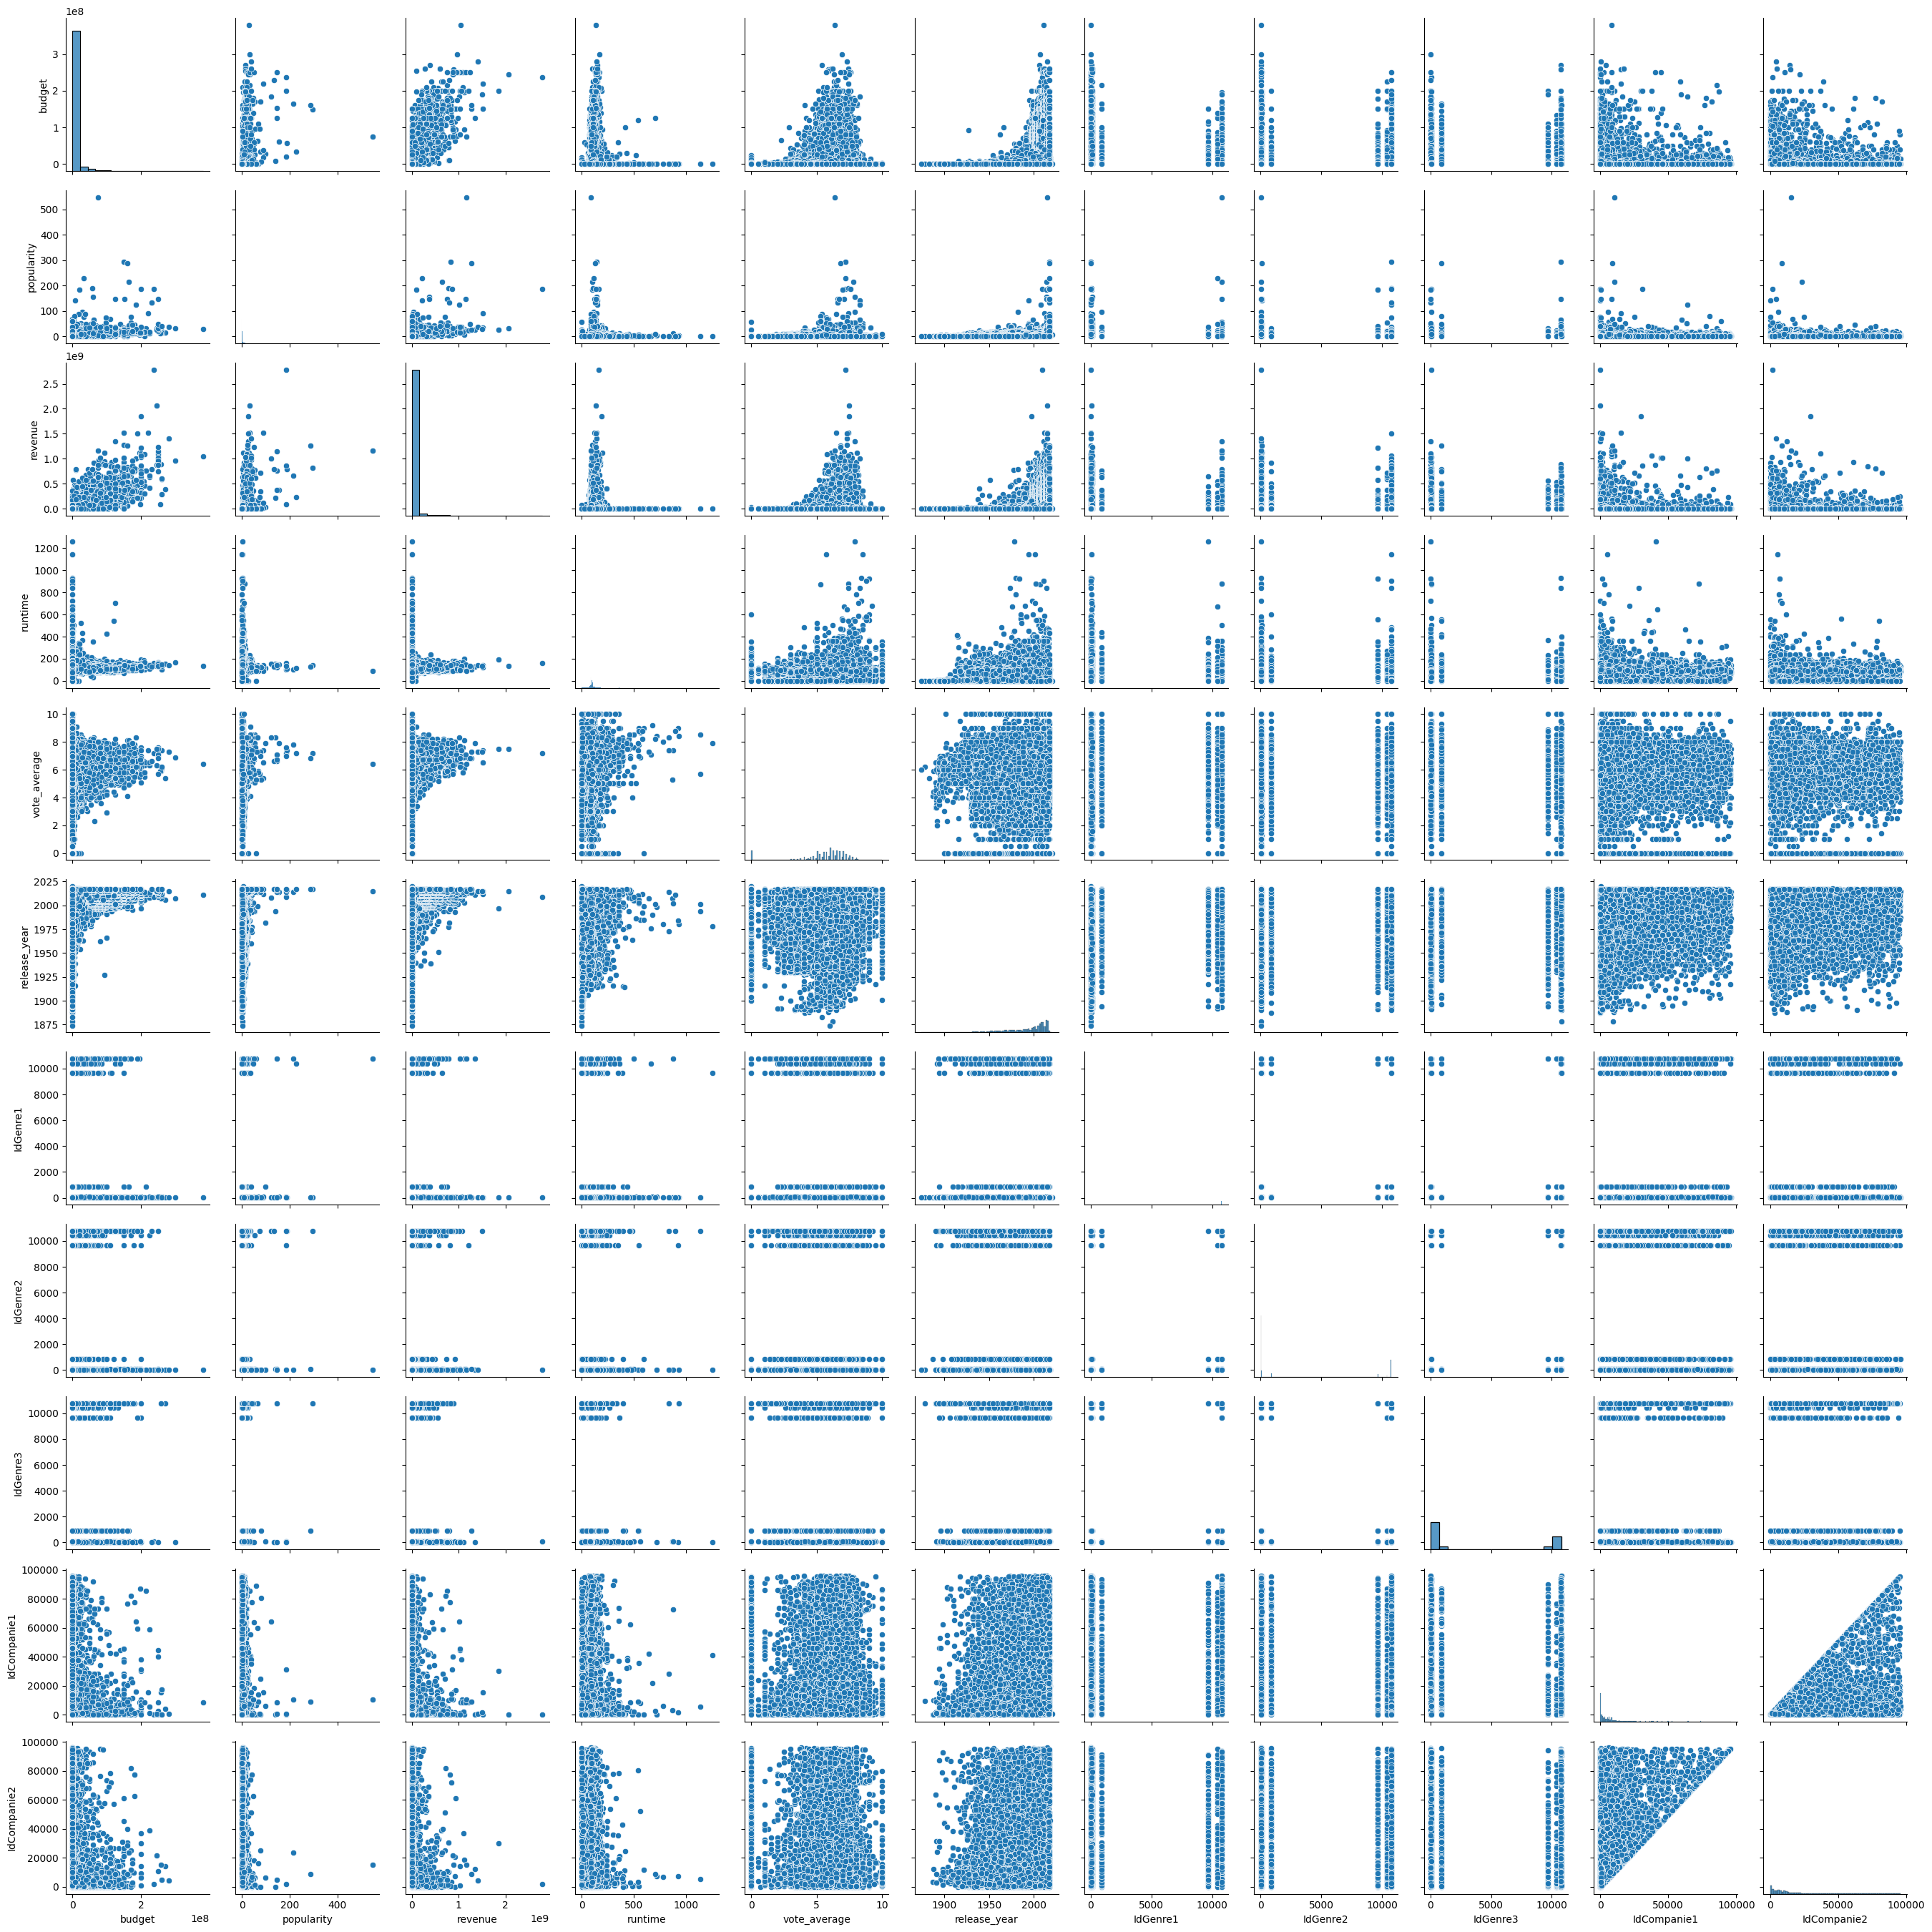

In [14]:
# Realizamos un pairplot para ver las relaciones entre las variables numericas, donde se observa una relacion entre la columna "budget",
# "renuvue" y "popularity"

sns.pairplot(new)
plt.show()

In [15]:
new2 = new.copy()

In [16]:
new2

,budget,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,release_year,IdGenre1,IdGenre2,IdGenre3,IdCompanie1,IdCompanie2,iso_3166_1,iso_639_1
0,30000000.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-10,373554033.0,81.0,Toy Story,7.7,1995.0,16.0,35.0,10751.0,3.0,NaN,US,en
1,65000000.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-12,262797249.0,104.0,Jumanji,6.9,1995.0,12.0,14.0,10751.0,559.0,2550.0,US,en
2,0.0,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-12,0.0,101.0,Grumpier Old Men,6.5,1995.0,10749.0,35.0,NaN,6194.0,19464.0,US,en
3,16000000.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-12,81452156.0,127.0,Waiting to Exhale,6.1,1995.0,35.0,18.0,10749.0,306.0,NaN,US,en
4,0.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-02,76578911.0,106.0,Father of the Bride Part II,5.7,1995.0,35.0,NaN,NaN,5842.0,9195.0,US,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45371,0.0,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-05,0.0,104.0,Robin Hood,5.7,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45372,0.0,tl,An artist struggles to finish his work while a...,0.178241,2011-11-11,0.0,360.0,Century of Birthing,9.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45373,0.0,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-08,0.0,90.0,Betrayal,3.8,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45374,0.0,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-10,0.0,87.0,Satan Triumphant,0.0,1917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Dropeamos columnas para facilitar el analisis.
new2.drop(["overview", "title", "iso_639_1", "release_date"], axis=1, inplace=True)

In [18]:
# Convertimos las variables a categorias para poder observar una matriz de correlación
new2["original_language"] = pd.Categorical(new2["original_language"]).codes
new2["iso_3166_1"] = pd.Categorical(new2["iso_3166_1"]).codes


In [19]:
# Observamos la matriz de correlación de Pearson. Se observa una relacion entre las columnas "popularity", "revenue" y "budget";
# asi mismo entre las columnas "IdCompanie1" y "IdCompanie2"

corr = new2.corr()
corr.style.background_gradient(cmap="coolwarm")

,budget,original_language,popularity,revenue,runtime,vote_average,release_year,IdGenre1,IdGenre2,IdGenre3,IdCompanie1,IdCompanie2,iso_3166_1
budget,1.000000,-0.071830,0.449568,0.768761,0.134742,0.073165,0.131675,-0.017031,0.001516,0.016588,-0.046215,-0.069491,0.030722
original_language,-0.071830,1.000000,-0.083713,-0.055971,0.046016,0.073378,0.047586,0.004445,0.003933,-0.015816,0.051213,0.056760,-0.033316
popularity,0.449568,-0.083713,1.000000,0.506158,0.129662,0.153773,0.131690,-0.000301,0.002832,0.007573,-0.061667,-0.074027,0.041920
revenue,0.768761,-0.055971,0.506158,1.000000,0.103940,0.083799,0.088355,-0.005266,-0.000806,0.004087,-0.034914,-0.050824,0.027717
runtime,0.134742,0.046016,0.129662,0.103940,1.000000,0.156732,0.078822,-0.008828,0.008698,0.002314,-0.052044,-0.081350,0.031206
vote_average,0.073165,0.073378,0.153773,0.083799,0.156732,1.000000,0.026138,-0.010022,0.010803,0.022043,-0.058252,-0.053968,0.043706
release_year,0.131675,0.047586,0.131690,0.088355,0.078822,0.026138,1.000000,0.011845,-0.020269,-0.016640,0.054711,0.040556,-0.057144
IdGenre1,-0.017031,0.004445,-0.000301,-0.005266,-0.008828,-0.010022,0.011845,1.000000,-0.144870,-0.112436,0.028993,0.047267,-0.016244
IdGenre2,0.001516,0.003933,0.002832,-0.000806,0.008698,0.010803,-0.020269,-0.144870,1.000000,0.040988,-0.021210,-0.007447,-0.017584
IdGenre3,0.016588,-0.015816,0.007573,0.004087,0.002314,0.022043,-0.016640,-0.112436,0.040988,1.000000,-0.024577,0.000938,-0.009601


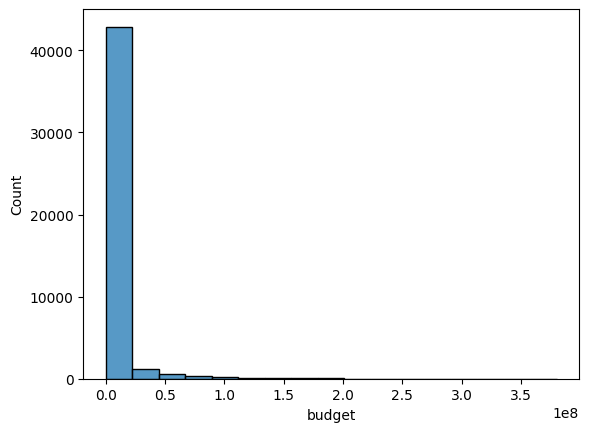

In [20]:
# Construimos histogramas con algunas variables para ver si hay outliers

sns.histplot(new2, x="budget")
plt.show()

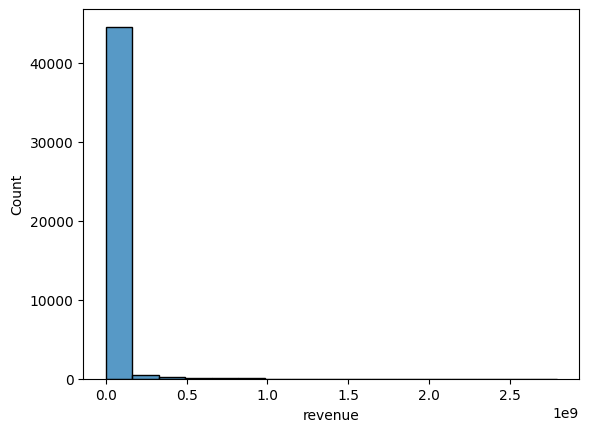

In [21]:
sns.histplot(new2, x="revenue")
plt.show()

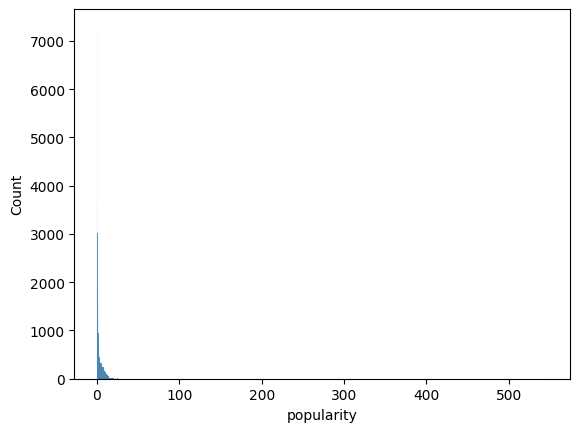

In [22]:
# En TMDB las puntuaciones van hasta 100, debido a que se hacen en porcentaje, por lo tanto observamos valores atipicos en esta columna.

sns.histplot(new2, x="popularity")
plt.show()

In [23]:
# Miramos los valores atipicos
valores_atipicos = new[new2["popularity"]>100]
valores_atipicos

,budget,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,release_year,IdGenre1,IdGenre2,IdGenre3,IdCompanie1,IdCompanie2,iso_3166_1,iso_639_1
292,8000000.0,en,"A burger-loving hit man, his philosophical par...",140.950236,1994-09-09,2.139288e+08,154.0,Pulp Fiction,8.3,1994.0,53.0,80.0,NaN,14.0,59.0,US,en
12476,185000000.0,en,Batman raises the stakes in his war on crime. ...,123.167259,2008-07-07,1.004558e+09,152.0,The Dark Knight,8.3,2008.0,18.0,10751.0,NaN,64111.0,NaN,AU,en
14545,237000000.0,en,"In the 22nd century, a paraplegic Marine is di...",185.070892,2009-12-12,2.787965e+09,162.0,Avatar,7.2,2009.0,28.0,12.0,80.0,79.0,1885.0,DE,en
23648,61000000.0,en,With his wife's disappearance having become th...,154.801009,2014-10-10,3.693304e+08,145.0,Gone Girl,7.9,2014.0,99.0,NaN,NaN,NaN,NaN,NaN,en
24322,20000000.0,en,Ex-lunatic John Wick comes off his meds to tra...,183.870374,2014-10-10,8.876166e+07,101.0,John Wick,7.0,2014.0,80.0,9648.0,18.0,306.0,NaN,US,en
24426,165000000.0,en,The special bond that develops between plus-si...,213.849907,2014-10-10,6.521054e+08,102.0,Big Hero 6,7.8,2014.0,10749.0,35.0,NaN,10229.0,23437.0,NZ,en
24843,125000000.0,en,Katniss Everdeen reluctantly becomes the symbo...,147.098006,2014-11-11,7.521002e+08,123.0,The Hunger Games: Mockingjay - Part 1,6.6,2014.0,16.0,35.0,10749.0,648.0,4641.0,JP,NaN
26530,230000000.0,en,"Thrust into an all-new paycheck, a down-on-his...",133.827820,2017-05-05,7.941920e+08,129.0,Pirates of the Caribbean: Dead Men Tell No Tales,6.6,2017.0,16.0,10751.0,12.0,NaN,NaN,JP,NaN
26534,58000000.0,en,Deadpool tells the origin story of former Spec...,187.860492,2016-02-02,7.831130e+08,108.0,Deadpool,7.4,2016.0,35.0,10749.0,NaN,NaN,NaN,NaN,NaN
26536,200000000.0,en,The Guardians must fight to keep their newfoun...,185.330992,2017-04-04,8.634161e+08,137.0,Guardians of the Galaxy Vol. 2,7.6,2017.0,18.0,10751.0,NaN,30943.0,NaN,CH,de


In [24]:
# PAra no eliminarlos del dataframe, se dividiran entre 10 para que entren en el rango apropiado

new2.loc[new2['popularity'] > 100, 'popularity'] /= 10

In [25]:
# Comprobamos nuevamente si hay valores atipicos
valores_atipicos = new[new2["popularity"]>100]
valores_atipicos

,budget,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,release_year,IdGenre1,IdGenre2,IdGenre3,IdCompanie1,IdCompanie2,iso_3166_1,iso_639_1


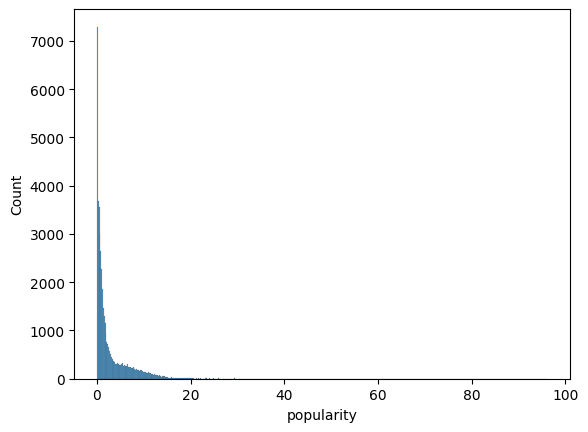

In [27]:
sns.histplot(new2, x="popularity")
plt.show()

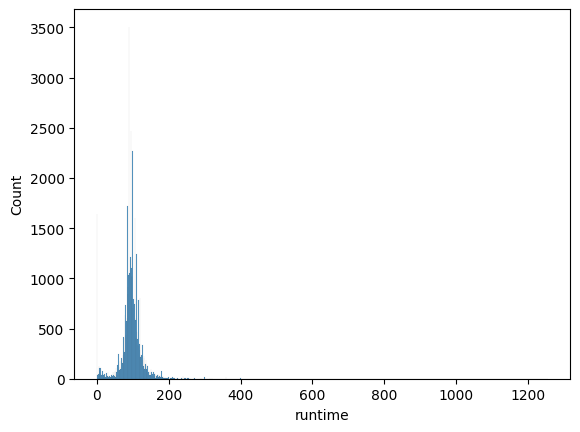

In [28]:
# Obsevamos que en runtime tambien hay valores muy altos, pero buscando documentación se encuentra que hay peliclas con duración de 21 horas.
sns.histplot(new2, x="runtime")
plt.show()

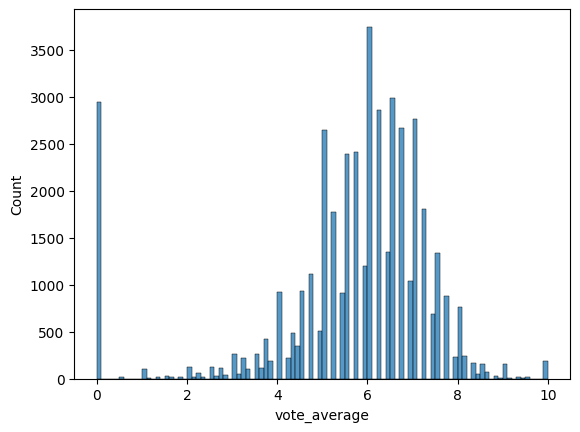

In [29]:
sns.histplot(new2, x="vote_average")
plt.show()

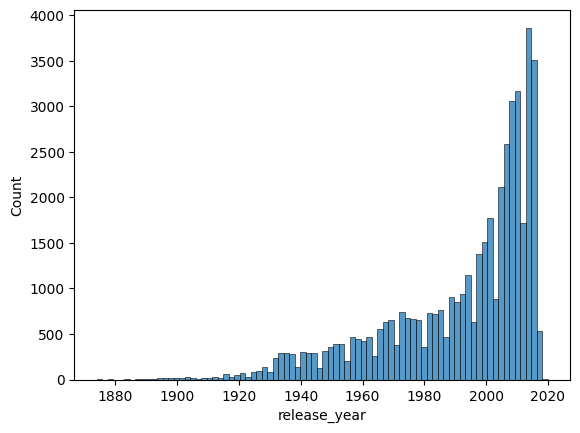

In [30]:
sns.histplot(new2, x="release_year")
plt.show()

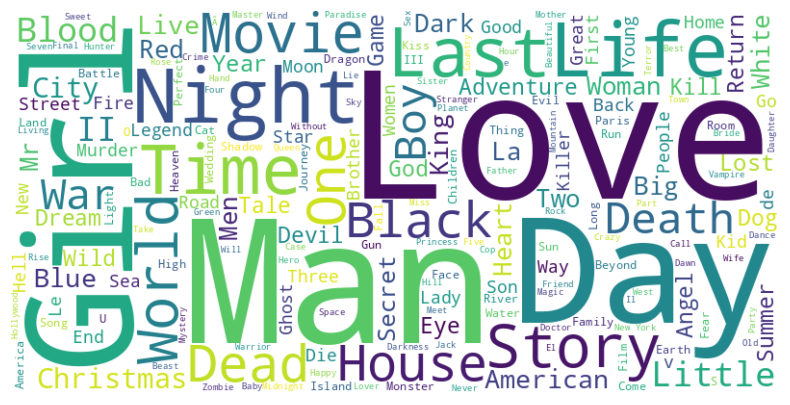

In [32]:
# Se concatena todos los valores de la columna "title" del DataFrame df_filtered en una sola cadena de texto
texto = ' '.join(df_filtered['title'].values)

# Se crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Se grafica la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()